In [2]:
from __future__ import print_function

import pandas as pd 
import numpy as np 
import sklearn

# NLTK/NLP
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import nltk
from nltk import FreqDist, word_tokenize
import string, re
import urllib
from nltk.corpus import stopwords
from gensim.models import word2vec
from nltk.collocations import *
import gensim
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec


# Classifiers 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost.sklearn import XGBClassifier  

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# Metrics
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve
from sklearn.model_selection import train_test_split
import scikitplot as skplt

#Sampling
from imblearn.pipeline import make_pipeline, Pipeline
from imblearn.over_sampling import SMOTE

#Visualization
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

# miscellaneous
from sklearn.utils import resample
import sklearn.decomposition as decomposition

import warnings 
warnings.filterwarnings("ignore")

import csv
import pickle

%run my_functions.ipynb

In [3]:
with open('data/cleaned-reshuffled.pkl', 'rb') as f:
	df = pickle.load(f)

In [4]:
df.head()

,id,label,tweet,tidy_tweet,no_hash_tweet,tokenized_tweet,stemmed_tokens,lemmatized_tokens,lem_tweet,stem_tweet
0,29727,0,sad to see the scenes of hooligans pre #engrus...,sad to see the scenes of hooligans pre #engrus...,sad to see the scenes of hooligans pre engrus ...,"[sad, to, see, the, scenes, of, hooligans, pre...","[sad, to, see, the, scene, of, hooligan, pre, ...","[sad, to, see, the, scene, of, hooligan, pre, ...",sad to see the scenes of hooligans pre engrus ...,sad to see the scenes of hooligans pre engrus ...
1,14466,0,#gooddyeyoung #yoyoyo !! super happy to be ap...,#gooddyeyoung #yoyoyo super happy to be apa of...,gooddyeyoung yoyoyo super happy to be apa of t...,"[gooddyeyoung, yoyoyo, super, happy, to, be, a...","[gooddyeyoung, yoyoyo, super, happi, to, be, a...","[gooddyeyoung, yoyoyo, super, happy, to, be, a...",gooddyeyoung yoyoyo super happy to be apa of t...,gooddyeyoung yoyoyo super happy to be apa of t...
2,18194,0,queen evil's bihdayð#lnic #lnicjustanevilbd...,queen evil s bihday #lnic #lnicjustanevilbday ...,queen evil s bihday lnic lnicjustanevilbday bi...,"[queen, evil, s, bihday, lnic, lnicjustanevilb...","[queen, evil, s, bihday, lnic, lnicjustanevilb...","[queen, evil, s, bihday, lnic, lnicjustanevilb...",queen evil s bihday lnic lnicjustanevilbday bi...,queen evil s bihday lnic lnicjustanevilbday bi...
3,18283,1,@user you might be a libtard if... #libtard #...,you might be a libtard if #libtard #sjw #liber...,you might be a libtard if libtard sjw liberal ...,"[you, might, be, a, libtard, if, libtard, sjw,...","[you, might, be, a, libtard, if, libtard, sjw,...","[you, might, be, a, libtard, if, libtard, sjw,...",you might be a libtard if libtard sjw liberal ...,you might be a libtard if libtard sjw liberal ...
4,25845,0,what are your goals? find out here... #smile...,what are your goals find out here #smile,what are your goals find out here smile,"[what, are, your, goals, find, out, here, smile]","[what, are, your, goal, find, out, here, smile]","[what, are, your, goal, find, out, here, smile]",what are your goals find out here smile,what are your goals find out here smil


## Train / Val / Test Split

In [5]:
X = df.drop(['label'], axis = 1)

In [6]:
y = df['label']

In [7]:
#splitting into train and test 
X_model, X_test, y_model, y_test = train_test_split(X, y, stratify = y, test_size=0.20, random_state=123)

In [8]:
#splitting "model" into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_model, y_model, stratify = y_model, test_size=0.20, random_state=123)

## Comparing Vectorization and Method Performance

In [145]:
#initializing vectorizers and creating tuple for wrapper comparison function

count_vect = CountVectorizer(1,1)
count_ngram1_2 = CountVectorizer(1,2)
count_ngram1_3 = CountVectorizer(1,3)

tfidf_vect = TfidfVectorizer(1,1)
tfidf_ngram1_2 = TfidfVectorizer(ngram_range=(1,2))
tfidf_ngram1_3 = TfidfVectorizer(ngram_range=(1,3))

vectorization_list = [('COUNT_VECTORIZER', count_vect),
                      ('COUNT_NGRAM_1_2', count_ngram1_2),
                      ('COUNT_NGRAM_1_3', count_ngram1_3),
                      ('TFIDF_VECTORIZER', tfidf_vect),
                      ('TFIDF_NGRAM_1_2', tfidf_ngram1_2),
                      ('TFIDF_NGRAM_1_3', tfidf_ngram1_3)]

# Multinomial Naive Bayes (MNB)

#### Initial Comparision: Multiple Vectorizer and Class Balance Corrections

In [75]:
np.random.seed(0)

In [76]:
#MNB with no class balance corrections
nb_results1 = compare_vectorization_model(X_train.lem_tweet, y_train, 
                                   X_val.lem_tweet, y_val, MultinomialNB(), vectorization_list)

nb_results1

,COUNT_VECTORIZER,COUNT_NGRAM_1_2,COUNT_NGRAM_1_3,TFIDF_VECTORIZER,TFIDF_NGRAM_1_2,TFIDF_NGRAM_1_3
Train Accuracy,0.97,0.97,0.97,0.94,0.94,0.94
Train F1,0.74,0.74,0.74,0.24,0.20,0.21
Train Precision,0.83,0.83,0.83,1.00,1.00,1.00
Train Recall,0.66,0.66,0.66,0.14,0.11,0.11
Validation Accuracy,0.96,0.96,0.96,0.94,0.94,0.94
Validation F1,0.60,0.60,0.60,0.20,0.17,0.18
Validation Precision,0.86,0.86,0.86,1.00,1.00,1.00
Validation Recall,0.46,0.46,0.46,0.11,0.09,0.10


In [77]:
nb_results1.to_csv('data/NB_results.csv', mode = 'a', header ='column_names')

In [78]:
#MNB with upsampling correction for class imbalance
nb_results3 = wrapper_compare_vectorizations(X_train.lem_tweet, y_train, 
                                   X_val.lem_tweet, y_val, MultinomialNB(), 
                                    vectorization_list, sampling = 'upsample')
nb_results3

,COUNT_VECTORIZER,COUNT_NGRAM_1_2,COUNT_NGRAM_1_3,TFIDF_VECTORIZER,TFIDF_NGRAM_1_2,TFIDF_NGRAM_1_3
Train Accuracy,0.97,0.97,0.97,0.97,0.99,0.99
Train F1,0.97,0.97,0.97,0.97,0.99,0.99
Train Precision,0.96,0.96,0.96,0.95,0.98,0.99
Train Recall,0.99,0.99,0.99,0.99,1.00,1.00
Validation Accuracy,0.92,0.92,0.92,0.90,0.90,0.90
Validation F1,0.57,0.57,0.57,0.53,0.55,0.53
Validation Precision,0.45,0.45,0.45,0.40,0.41,0.39
Validation Recall,0.79,0.79,0.79,0.81,0.82,0.84


In [79]:
nb_results3.to_csv('data/NB_results.csv', mode = 'a', header ='column_names')

In [80]:
#MNB with downsampling correction for class imbalance
nb_results4 = wrapper_compare_vectorizations(X_train.lem_tweet, y_train, 
                                   X_val.lem_tweet, y_val, MultinomialNB(), 
                                    vectorization_list, sampling = 'downsample')
nb_results4

,COUNT_VECTORIZER,COUNT_NGRAM_1_2,COUNT_NGRAM_1_3,TFIDF_VECTORIZER,TFIDF_NGRAM_1_2,TFIDF_NGRAM_1_3
Train Accuracy,0.97,0.97,0.97,0.97,0.99,1.00
Train F1,0.97,0.97,0.97,0.97,0.99,1.00
Train Precision,0.97,0.97,0.97,0.96,1.00,1.00
Train Recall,0.98,0.98,0.98,0.98,0.99,1.00
Validation Accuracy,0.84,0.84,0.84,0.83,0.83,0.83
Validation F1,0.44,0.44,0.44,0.43,0.42,0.42
Validation Precision,0.29,0.29,0.29,0.28,0.27,0.27
Validation Recall,0.89,0.89,0.89,0.89,0.87,0.90


In [81]:
nb_results4.to_csv('data/NB_results.csv', mode = 'a', header ='column_names')

In [82]:
#MNB with smote correction for class imbalance
nb_results5 = wrapper_compare_vectorizations(X_train.lem_tweet, y_train, 
                                   X_val.lem_tweet, y_val, MultinomialNB(), 
                                    vectorization_list, sampling = 'smote')
nb_results5

,COUNT_VECTORIZER,COUNT_NGRAM_1_2,COUNT_NGRAM_1_3,TFIDF_VECTORIZER,TFIDF_NGRAM_1_2,TFIDF_NGRAM_1_3
Train Accuracy,0.96,0.96,0.96,0.95,0.98,0.99
Train F1,0.76,0.76,0.76,0.73,0.86,0.91
Train Precision,0.68,0.68,0.68,0.58,0.75,0.84
Train Recall,0.85,0.85,0.85,0.99,1.00,1.00
Validation Accuracy,0.95,0.95,0.95,0.91,0.91,0.91
Validation F1,0.64,0.64,0.64,0.56,0.56,0.56
Validation Precision,0.60,0.60,0.60,0.42,0.43,0.42
Validation Recall,0.67,0.67,0.67,0.82,0.83,0.83


In [ ]:
nb_results5.to_csv('data/NB_results.csv', mode = 'a', header ='column_names')

### Fine Tuning Based on Best Performance with Count Vectorizer and SMOTE

In [ ]:
np.random.seed(10)

nb = MultinomialNB()

scores = ['accuracy','recall','precision','f1']

nb_gs = GridSearchCV(logreg, param_grid = parameters, 
                           verbose = 0, scoring = scores, cv = 3, refit = 'f1')

In [ ]:
nb_model, nb_X_val, nb_y_train_pred, nb_y_val_pred, \
                nb_y_val_prob, nb_metrics_dict, nb_pred_df = \
wrapper_single_vectorization(X_train.lem_tweet, y_train, X_val.lem_tweet, 
                y_val, nb, count_vect, sampling= 'smote')

In [ ]:
nb_metrics_dict

In [ ]:
seaborn_confusion_matrix(y_val, nb_y_val_pred)

In [ ]:
skplt.metrics.plot_precision_recall_curve(y_val, nb_y_val_prob)

In [ ]:
nb_adj_y_val, cm = adjust_threshold_and_score(y_val, nb_y_val_prob, .2)

## Final Naive Bayes Model:  Performance on Test Set 

In [ ]:
#use smote and count vectorizer based on validation process
nb_test_model, nb_X_val, nb_y_train_pred, nb_y_val_pred, \
                nb_y_val_prob, nb_metrics_dict, nb_pred_df = \
wrapper_single_vectorization(X_train.lem_tweet, y_train, X_val.lem_tweet, 
                y_val, MultinomialNB(), count_vect, sampling= 'smote')

In [ ]:
#final score based on adjusted threshold
nb_adj_y_true, cm = adjust_threshold_and_score(y_val, nb_y_val_prob, .2)

# Logistic Regression

### Comparing multiple vectorization methods and sampling methods

In [146]:
#Logistic Regression: lemmatizing + no adjustments
lr_results1 = wrapper_compare_vectorizations(X_train.lem_tweet, 
                            y_train, X_val.lem_tweet, y_val, 
                            LogisticRegression(solver = 'lbfgs', random_state = 10), 
                                            vectorization_list)

lr_results1

,COUNT_VECTORIZER,COUNT_NGRAM_1_2,COUNT_NGRAM_1_3,TFIDF_VECTORIZER,TFIDF_NGRAM_1_2,TFIDF_NGRAM_1_3
Train Accuracy,0.99,0.99,0.99,0.95,0.94,0.94
Train F1,0.89,0.89,0.89,0.43,0.29,0.22
Train Precision,0.99,0.99,0.99,0.97,0.99,0.99
Train Recall,0.80,0.80,0.80,0.28,0.17,0.12
Validation Accuracy,0.96,0.96,0.96,0.95,0.94,0.94
Validation F1,0.64,0.64,0.64,0.44,0.33,0.28
Validation Precision,0.85,0.85,0.85,0.92,0.91,0.88
Validation Recall,0.51,0.51,0.51,0.29,0.20,0.16


In [ ]:
lr_results1.to_csv('data/LR_results.csv',mode = 'a',header ='column_names')

In [11]:
#Logistic Regression: compare vectorizers using lemmitizing + class balances
lr_results2 = wrapper_compare_vectorizations(X_train.lem_tweet, 
                            y_train, X_val.lem_tweet, y_val, 
                            LogisticRegression(class_weight= 'balanced', 
                            solver = 'lbfgs', random_state = 10), vectorization_list)
lr_results2

,COUNT_VECTORIZER,COUNT_NGRAM_1_2,COUNT_NGRAM_1_3,TFIDF_VECTORIZER,TFIDF_NGRAM_1_2,TFIDF_NGRAM_1_3
Train Accuracy,0.99,0.99,0.99,0.97,0.99,0.99
Train F1,0.93,0.93,0.93,0.81,0.91,0.96
Train Precision,0.87,0.87,0.87,0.68,0.84,0.92
Train Recall,0.99,0.99,0.99,0.99,1.00,1.00
Validation Accuracy,0.95,0.95,0.95,0.94,0.94,0.94
Validation F1,0.66,0.66,0.66,0.63,0.63,0.62
Validation Precision,0.62,0.62,0.62,0.53,0.55,0.54
Validation Recall,0.72,0.72,0.72,0.78,0.74,0.73


In [ ]:
lr_results2.to_csv('data/LR_results.csv',mode = 'a',header ='column_names')

In [13]:
#Logistic Regression: compare vectorizers using lemmitizing + upsampling
lr_results3 = wrapper_compare_vectorizations(X_train.lem_tweet, 
                            y_train, X_val.lem_tweet, y_val, 
                            LogisticRegression(solver = 'lbfgs', 
                            random_state = 10), vectorization_list, sampling = 'upsample')
lr_results3

,COUNT_VECTORIZER,COUNT_NGRAM_1_2,COUNT_NGRAM_1_3,TFIDF_VECTORIZER,TFIDF_NGRAM_1_2,TFIDF_NGRAM_1_3
Train Accuracy,0.99,0.99,0.99,0.99,1.00,1.00
Train F1,0.99,0.99,0.99,0.99,1.00,1.00
Train Precision,0.99,0.99,0.99,0.97,0.99,1.00
Train Recall,1.00,1.00,1.00,1.00,1.00,1.00
Validation Accuracy,0.95,0.95,0.95,0.94,0.94,0.93
Validation F1,0.67,0.67,0.67,0.62,0.62,0.60
Validation Precision,0.63,0.63,0.63,0.53,0.54,0.50
Validation Recall,0.70,0.70,0.70,0.75,0.74,0.74


In [ ]:
lr_results3.to_csv('data/LR_results.csv',mode = 'a',header ='column_names')

In [14]:
#Logistic Regression: compare vectorizers using lemmitizing + downsampling
lr_results4 = wrapper_compare_vectorizations(X_train.lem_tweet, 
                            y_train, X_val.lem_tweet, y_val, 
                            LogisticRegression(random_state = 10, solver = 'lbfgs'), 
                            vectorization_list, sampling = 'downsample')
lr_results4

,COUNT_VECTORIZER,COUNT_NGRAM_1_2,COUNT_NGRAM_1_3,TFIDF_VECTORIZER,TFIDF_NGRAM_1_2,TFIDF_NGRAM_1_3
Train Accuracy,0.99,0.99,0.99,0.96,0.98,0.99
Train F1,0.99,0.99,0.99,0.96,0.98,0.99
Train Precision,1.00,1.00,1.00,0.96,0.98,0.99
Train Recall,0.99,0.99,0.99,0.97,0.98,0.99
Validation Accuracy,0.85,0.85,0.85,0.83,0.81,0.80
Validation F1,0.44,0.44,0.44,0.42,0.40,0.38
Validation Precision,0.30,0.30,0.30,0.27,0.26,0.24
Validation Recall,0.84,0.84,0.84,0.86,0.88,0.87


In [ ]:
lr_results4.to_csv('data/LR_results.csv',mode = 'a',header ='column_names')

In [15]:
#Logistic Regression: compare vectorizers using lemmitizing + smote
lr_results5 = wrapper_compare_vectorizations(X_train.lem_tweet, 
                            y_train, X_val.lem_tweet, y_val, 
                            LogisticRegression(random_state = 10, solver = 'lbfgs'), 
                            vectorization_list, sampling = 'smote', sample_class = 'not majority')
lr_results5

,COUNT_VECTORIZER,COUNT_NGRAM_1_2,COUNT_NGRAM_1_3,TFIDF_VECTORIZER,TFIDF_NGRAM_1_2,TFIDF_NGRAM_1_3
Train Accuracy,0.96,0.96,0.96,0.98,0.99,1.00
Train F1,0.75,0.75,0.75,0.85,0.95,0.97
Train Precision,0.66,0.66,0.66,0.75,0.91,0.95
Train Recall,0.87,0.87,0.87,0.98,0.99,1.00
Validation Accuracy,0.89,0.89,0.89,0.94,0.95,0.94
Validation F1,0.48,0.48,0.48,0.65,0.65,0.65
Validation Precision,0.36,0.36,0.36,0.56,0.60,0.58
Validation Recall,0.70,0.70,0.70,0.75,0.72,0.72


In [ ]:
lr_results5.to_csv('data/LR_results.csv',mode = 'a',header ='column_names')

## Grid Searching 2:

In [33]:
from imblearn.over_sampling import RandomOverSampler

In [43]:
count_vect = CountVectorizer()

In [44]:
Xt = count_vect.fit_transform(X_train.lem_tweet)

In [35]:
Xvt = count_vect.transform(X_val.lem_tweet)

In [36]:
ros = RandomOverSampler(random_state=10, sampling_strategy = 'minority')

In [40]:
X_up, y_up = upsample_training_data(Xt, y_train)

In [42]:
X_up, y_up 

(                                                       0
 6150     (0, 3623)\t1\n  (0, 1341)\t1\n  (0, 13321)\t...
 2964     (0, 22876)\t1\n  (0, 28229)\t1\n  (0, 9635)\...
 12469    (0, 9614)\t1\n  (0, 22358)\t1\n  (0, 7856)\t...
 7697     (0, 24571)\t1\n  (0, 9292)\t1\n  (0, 5536)\t...
 8774     (0, 23271)\t1\n  (0, 22943)\t1\n  (0, 22669)...
 2913                       (0, 1602)\t1\n  (0, 16694)\t1
 3696     (0, 22277)\t1\n  (0, 22773)\t1\n  (0, 4119)\...
 16963    (0, 12135)\t1\n  (0, 3125)\t1\n  (0, 28064)\...
 11665    (0, 25525)\t1\n  (0, 4544)\t1\n  (0, 8181)\t...
 20195      (0, 4288)\t1\n  (0, 5017)\t1\n  (0, 12933)\t1
 160      (0, 11907)\t1\n  (0, 16389)\t1\n  (0, 16386)...
 1561     (0, 24973)\t1\n  (0, 24975)\t1\n  (0, 11852)...
 6031     (0, 24932)\t1\n  (0, 17200)\t1\n  (0, 18472)...
 11555    (0, 23107)\t1\n  (0, 15861)\t1\n  (0, 12442)...
 911      (0, 11886)\t1\n  (0, 173)\t1\n  (0, 19325)\t...
 11808    (0, 18992)\t1\n  (0, 22636)\t1\n  (0, 17124)...
 9977     (0, 

In [41]:
results_lr2 = logreg.fit(X_up, y_up)

ValueError: setting an array element with a sequence.

In [ ]:
lr_gs_model1, lr_X_val1, lr_y_train_pred1, lr_y_val_pred1, \
                lr_y_val_prob1, lr_metrics_dict1, lr_pred_df1 = \
upsample_vector_model(X_train.lem_tweet, y_train, X_val.lem_tweet, 
                y_val, LogisticRegression (random_state=10), count_vect)

In [ ]:
lr_metrics_dict1

In [45]:
X_ros, y_ros = ros.fit_resample(Xt, y_train)

In [46]:
results_lr = logreg.fit (X_ros,y_ros)

In [47]:
y_ros_pred = logreg.predict(X_ros)

In [ ]:
X_ros.shape

In [ ]:
y_ros.shape

In [48]:
logreg.score (X_ros,y_ros)

0.9947423764458465

In [49]:
Xt.shape

(20455, 28654)

In [50]:
metrics.precision_score(y_ros, y_ros_pred)

0.9932382849355278

In [51]:
metrics.accuracy_score(y_ros, y_ros_pred)

0.9947423764458465

In [52]:
metrics.f1_score(y_ros, y_ros_pred)

0.9947503805974066

In [ ]:
Xt.shape

In [ ]:
Xvt.shape

In [53]:
yvt = logreg.predict(Xvt)

In [54]:
metrics.f1_score(yvt, y_val)

0.6666666666666666

In [67]:
# c_space = np.linspace (.1, 10, 100)

count_vect = CountVectorizer()
TfidfVectorizer

parameters = { 'logisticregression__C': [.001, .1, .5, 1, 5, 8, 10],
              'logisticregression__penalty': ['l1', 'l2']}

lr = LogisticRegression(random_state = 10)
pipe = make_pipeline(count_vect, ros, lr)

scores = ['accuracy','precision','recall','f1']

grid = GridSearchCV(pipe, param_grid = parameters, 
                           verbose = 0, scoring = scores, cv = 3, refit = 'f1', return_train_score=True)
    
grid.fit(X_train.lem_tweet, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('countvectorizer',
                                        CountVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.int64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                 

In [71]:
grid.best_params_

{'logisticregression__C': 1, 'logisticregression__penalty': 'l2'}

In [141]:
rosdf = pd.DataFrame(grid.cv_results_)
rosdf.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logisticregression__C,param_logisticregression__penalty,params,split0_test_accuracy,split1_test_accuracy,split2_test_accuracy,...,split1_test_f1,split2_test_f1,mean_test_f1,std_test_f1,rank_test_f1,split0_train_f1,split1_train_f1,split2_train_f1,mean_train_f1,std_train_f1
0,0.839176,0.005772,1.273821,0.095428,0.001,l1,"{'logisticregression__C': 0.001, 'logisticregr...",0.929755,0.929891,0.929891,...,0.000000,0.000000,0.000000,0.000000,14,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.925792,0.010843,1.154761,0.042401,0.001,l2,"{'logisticregression__C': 0.001, 'logisticregr...",0.801144,0.806395,0.812702,...,0.342629,0.355376,0.347433,0.005657,13,0.380478,0.381494,0.385736,0.382569,0.002277
2,1.032348,0.021862,1.301557,0.122417,0.1,l1,"{'logisticregression__C': 0.1, 'logisticregres...",0.902478,0.895864,0.897624,...,0.497167,0.502849,0.507086,0.010274,12,0.584500,0.612536,0.594278,0.597104,0.011619
3,1.487220,0.176811,1.150906,0.004143,0.1,l2,"{'logisticregression__C': 0.1, 'logisticregres...",0.935034,0.926958,0.931798,...,0.580808,0.582960,0.590924,0.012814,11,0.806382,0.815199,0.815232,0.812271,0.004164
4,1.246218,0.144490,1.239258,0.033646,0.5,l1,"{'logisticregression__C': 0.5, 'logisticregres...",0.942514,0.938252,0.936785,...,0.601703,0.583575,0.603267,0.016753,10,0.861538,0.867701,0.862069,0.863769,0.002788


In [139]:
ros_df = rosdf[['mean_train_f1', 'mean_test_f1']]
ros_df.head(10)

,mean_train_f1,mean_test_f1
0,0.000000,0.000000
1,0.382569,0.347433
2,0.597104,0.507086
3,0.812271,0.590924
4,0.863769,0.603267
5,0.933595,0.625527
6,0.933408,0.610001
7,0.965390,0.628676
8,0.997220,0.611354
9,0.994797,0.619020


In [140]:
grid.best_score_

0.6286755443709123

### Grid Searching for Best Hyperparameters  

In [162]:
np.random.seed(10)

# c_space = np.linspace (.1, 10, 100)

ros = RandomOverSampler(random_state=10, sampling_strategy = 'minority')
count_vect = CountVectorizer()

parameters = { 'logisticregression__C': [.001, .01, .1, .2, .3 , .4, .5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'logisticregression__penalty': ['l1', 'l2']}

lr = LogisticRegression(random_state = 10)
pipe = make_pipeline(count_vect, ros, lr)

scores = ['accuracy','precision','recall','f1']

lr_gs = GridSearchCV(pipe, param_grid = parameters, 
                           verbose = 0, scoring = scores, cv = 3, refit = 'f1', return_train_score=True)


In [217]:
lr_gs.fit(X_train.lem_tweet, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('countvectorizer',
                                        CountVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.int64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                 

In [218]:
lr_gs.best_params_

{'logisticregression__C': 1, 'logisticregression__penalty': 'l2'}

In [219]:
lr_gs.best_score_

0.6286755443709123

In [259]:
a = pd.DataFrame(lr_gs.cv_results_)
a.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logisticregression__C,param_logisticregression__penalty,params,split0_test_accuracy,split1_test_accuracy,split2_test_accuracy,...,split1_test_f1,split2_test_f1,mean_test_f1,std_test_f1,rank_test_f1,split0_train_f1,split1_train_f1,split2_train_f1,mean_train_f1,std_train_f1
0,0.764792,0.033690,1.417686,0.028234,0.001,l1,"{'logisticregression__C': 0.001, 'logisticregr...",0.929755,0.929891,0.929891,...,0.000000,0.000000,0.000000,0.000000,34,0.000000,0.000000,0.000000,0.000000,0.000000
1,1.093871,0.137799,1.423274,0.172299,0.001,l2,"{'logisticregression__C': 0.001, 'logisticregr...",0.801144,0.806395,0.812702,...,0.342629,0.355376,0.347433,0.005657,32,0.380478,0.381494,0.385736,0.382569,0.002277
2,1.096561,0.195606,1.464875,0.248231,0.01,l1,"{'logisticregression__C': 0.01, 'logisticregre...",0.778120,0.775154,0.807275,...,0.295820,0.302548,0.300912,0.003676,33,0.302919,0.307370,0.323552,0.311281,0.008866
3,1.198133,0.195634,1.430904,0.039917,0.01,l2,"{'logisticregression__C': 0.01, 'logisticregre...",0.885174,0.883984,0.888677,...,0.474419,0.484024,0.479852,0.004022,31,0.569825,0.582861,0.576396,0.576361,0.005322
4,1.475290,0.082690,1.891940,0.107804,0.1,l1,"{'logisticregression__C': 0.1, 'logisticregres...",0.902478,0.895864,0.897624,...,0.497167,0.502849,0.507086,0.010274,30,0.584500,0.612536,0.594278,0.597104,0.011619


In [261]:
b = a[a.rank_test_f1 == 1]
b

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logisticregression__C,param_logisticregression__penalty,params,split0_test_accuracy,split1_test_accuracy,split2_test_accuracy,...,split1_test_f1,split2_test_f1,mean_test_f1,std_test_f1,rank_test_f1,split0_train_f1,split1_train_f1,split2_train_f1,mean_train_f1,std_train_f1
15,1.903938,0.046851,1.416942,0.025739,1,l2,"{'logisticregression__C': 1, 'logisticregressi...",0.946033,0.946759,0.947785,...,0.638086,0.619658,0.628676,0.007528,1,0.964051,0.965622,0.966497,0.96539,0.001012


In [249]:
np.mean(a.mean_train_f1)

0.3734629927016888

In [248]:
np.mean(a.mean_test_f1)

0.3270565485879038

In [221]:
metrics.f1_score(y_model, p)

0.9499467518636847

In [191]:
lr_gs

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('countvectorizer',
                                        CountVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.int64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                 

In [271]:
from sklearn.model_selection import cross_val_predict

In [303]:
ypred = cross_val_predict(lr_gs, X_model.lem_tweet, y_model)

In [286]:
yprob = cross_val_predict(lr_gs, X_model.lem_tweet, y_model, method = "predict_proba")

In [288]:
pd.DataFrame(yprob)

,0,1
0,0.992302,0.007698
1,0.999793,0.000207
2,0.995764,0.004236
3,0.997721,0.002279
4,0.999431,0.000569
5,0.996968,0.003032
6,0.938404,0.061596
7,0.998229,0.001771
8,0.997290,0.002710
9,0.780362,0.219638


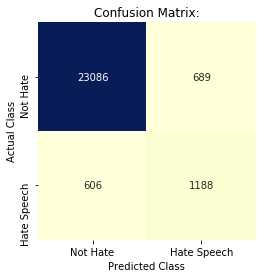

In [304]:
seaborn_confusion_matrix (y_model, ypred)

In [311]:
metrics.f1_score(y_model, ypred)

0.6472350858076819

Adjusted Accuracy: 0.9529899487660839
Adjusted Precision: 0.6770334928229665
Adjusted Recall: 0.6309921962095875
Adjusted F1 Score: 0.6532025389497981




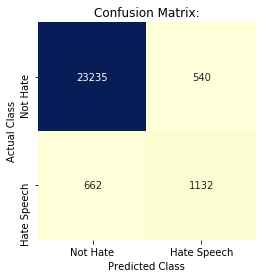

In [300]:
a, b = adjust_threshold_and_score(y_model, yprob, .42)

In [ ]:
a, b = adjust_threshold_and_score(y_test, ytest, .42)

In [232]:
lr_model, lr_X_test, lr_y_train_pred, lr_y_true_pred, \
                lr_y_true_prob, lr_metrics_dict, lr_pred_df = \
wrapper_single_vectorization(X_train.lem_tweet, y_train, X_val.lem_tweet, y_val, 
                             lr_gs, count_vect)

In [233]:
lr_metrics_dict

{'Train Accuracy': 0.99,
 'Train Precision': 0.99,
 'Train Recall': 0.8,
 'Train F1': 0.89,
 'Validation Accuracy': 0.96,
 'Validation Precision': 0.86,
 'Validation Recall': 0.51,
 'Validation F1': 0.64}

In [243]:
lr_pred_df['a'] = a

Adjusted Accuracy: 0.9550254204145483
Adjusted Precision: 0.6776859504132231
Adjusted Recall: 0.6852367688022284
Adjusted F1 Score: 0.6814404432132964




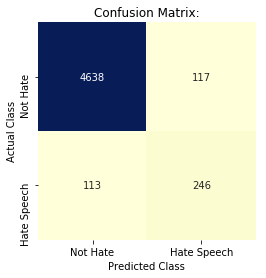

In [238]:
a, b = adjust_threshold_and_score(y_val, lr_y_true_prob, .8)

In [201]:
seaborn_confusion_matrix(y_train_up, lr_y_train_pred)

NameError: name 'y_train_up' is not defined

In [305]:
np.random.seed(10)

logreg = LogisticRegression(random_state= 10)
# c_space = np.linspace (.1, 10, 100)

parameters = {'C': [.001, .01, .1, .2, .3 , .4, .5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'penalty': ['l1', 'l2']}

scores = ['accuracy','recall','precision','f1']

lr_gs2 = GridSearchCV(logreg, param_grid = parameters, 
                           verbose = 0, scoring = scores, cv = 3, refit = 'f1', return_train_score= True)

In [306]:
lr_gs_model, lr_X_val, lr_y_train_pred, lr_y_val_pred, \
                lr_y_val_prob, lr_metrics_dict, lr_pred_df = \
wrapper_single_vectorization(X_train.lem_tweet, y_train, X_val.lem_tweet,y_val, 
                             lr_gs2, count_vect, sampling= 'upsample')

In [307]:
lr_gs_model.best_params_

{'C': 9, 'penalty': 'l1'}

In [308]:
lr_metrics_dict

{'Train Accuracy': 1.0,
 'Train Precision': 1.0,
 'Train Recall': 1.0,
 'Train F1': 1.0,
 'Validation Accuracy': 0.95,
 'Validation Precision': 0.65,
 'Validation Recall': 0.67,
 'Validation F1': 0.66}

Adjusted Accuracy: 0.9579585451701212
Adjusted Precision: 0.7368421052631579
Adjusted Recall: 0.6239554317548747
Adjusted F1 Score: 0.6757164404223227




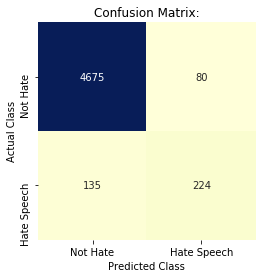

In [309]:
a, b = adjust_threshold_and_score (y_val, lr_y_val_prob, .2)

In [312]:
a = pd.DataFrame(lr_gs_model.cv_results_)

b = a[a.rank_test_f1 == 1]
b

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_accuracy,split1_test_accuracy,split2_test_accuracy,...,split1_test_f1,split2_test_f1,mean_test_f1,std_test_f1,rank_test_f1,split0_train_f1,split1_train_f1,split2_train_f1,mean_train_f1,std_train_f1
30,0.58781,0.068473,0.03346,0.002019,9,l1,"{'C': 9, 'penalty': 'l1'}",0.984937,0.980284,0.983438,...,0.980665,0.983696,0.983169,0.001867,1,0.999527,0.999842,0.999606,0.999658,0.000134


In [250]:
np.mean(lr_gs_df.mean_train_f1)

0.996528473808398

In [251]:
np.mean(lr_gs_df.mean_test_f1)

0.9805540886752182

In [27]:
lr_model, lr_X_val, lr_y_train_pred, lr_y_val_pred, \
                lr_y_val_prob, lr_metrics_dict, lr_pred_df = \
wrapper_single_vectorization(X_train.lem_tweet, y_train, X_val.lem_tweet, 
                y_val, LogisticRegression(C = 8.4, penalty = 'l1', random_state = 10),                                          
                 count_vect, sampling= 'upsample')

In [28]:
lr_metrics_dict

{'Train Accuracy': 1.0,
 'Train Precision': 1.0,
 'Train Recall': 1.0,
 'Train F1': 1.0,
 'Validation Accuracy': 0.95,
 'Validation Precision': 0.65,
 'Validation Recall': 0.66,
 'Validation F1': 0.65}

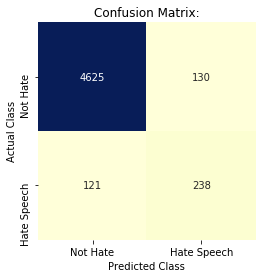

In [29]:
#want to reduce number of records predicted as 0 that are actually 1 
seaborn_confusion_matrix(y_val, lr_y_val_pred)

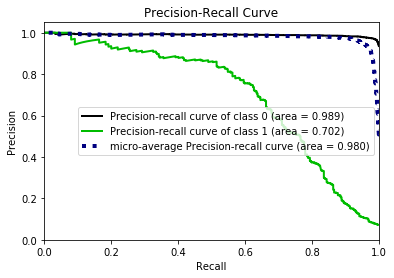

In [30]:
skplt.metrics.plot_precision_recall_curve(y_val, lr_y_val_prob)

Adjusted Accuracy: 0.9587407117716074
Adjusted Precision: 0.7466666666666667
Adjusted Recall: 0.6239554317548747
Adjusted F1 Score: 0.6798179059180577




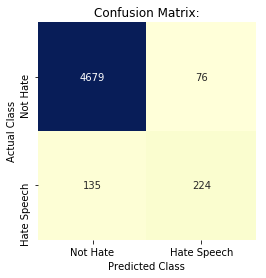

In [32]:
lr_pred_adj, cm = adjust_threshold_and_score(y_val, lr_y_val_prob, .2)

In [ ]:
lr_pred_df['adjusted class'] = lr_pred_adj

In [ ]:
lr_pred_df.head()

In [ ]:
lr_misclassified_df = lr_pred_df[lr_pred_df['predicted class'] != lr_pred_df['actual class']]
lr_misclassified_df.head()

In [ ]:
lr_misclassified_df.shape

In [ ]:
lr_misclassified2_df = lr_misclassified_df[lr_misclassified_df['adjusted class'] != lr_misclassified_df['actual class']]
lr_misclassified2_df.head()

In [ ]:
lr_misclassified2_df.shape

In [ ]:
df.tweet[12608]

In [ ]:
df.lem_tweet[28669]

In [ ]:
df.tweet[2748]

In [ ]:
# import eli5
# from eli5 import explain_weights, explain_prediction
# from eli5.formatters import format_as_html, format_as_text, format_html_styles, fields

In [ ]:
# eli5.show_weights(log, vec= count_vect, target_names= y_test, horizontal_layout=False)

In [ ]:
# skplt.metrics.plot_precision_recall_curve(y_test, lr_y_prob_test)

## SVM


In [83]:
#SVM with lemmatizing + no class balance corrections
svm_results1 = wrapper_compare_vectorizations(X_train.lem_tweet, 
                            y_train, X_val.lem_tweet, y_val, 
                            SVC(gamma='auto', probability = True, random_state = 10), 
                            vectorization_list)
svm_results1 

,COUNT_VECTORIZER,COUNT_NGRAM_1_2,COUNT_NGRAM_1_3,TFIDF_VECTORIZER,TFIDF_NGRAM_1_2,TFIDF_NGRAM_1_3
Train Accuracy,0.93,0.93,0.93,0.93,0.93,0.93
Train F1,0.00,0.00,0.00,0.00,0.00,0.00
Train Precision,0.00,0.00,0.00,0.00,0.00,0.00
Train Recall,0.00,0.00,0.00,0.00,0.00,0.00
Validation Accuracy,0.93,0.93,0.93,0.93,0.93,0.93
Validation F1,0.00,0.00,0.00,0.00,0.00,0.00
Validation Precision,0.00,0.00,0.00,0.00,0.00,0.00
Validation Recall,0.00,0.00,0.00,0.00,0.00,0.00


In [84]:
# svm_results1.to_csv('data/SVM_results.csv',mode = 'a',header ='column_names')

In [85]:
#SVM with lemmatizing + class weight 'balanced' correction
svm_results2 = wrapper_compare_vectorizations(X_train.lem_tweet, 
                            y_train, X_val.lem_tweet, y_val, 
                            SVC(gamma='auto', class_weight = 'balanced', probability = True, random_state = 10), 
                            vectorization_list)
svm_results2

,COUNT_VECTORIZER,COUNT_NGRAM_1_2,COUNT_NGRAM_1_3,TFIDF_VECTORIZER,TFIDF_NGRAM_1_2,TFIDF_NGRAM_1_3
Train Accuracy,0.07,0.07,0.07,0.07,0.07,0.07
Train F1,0.13,0.13,0.13,0.13,0.13,0.13
Train Precision,0.07,0.07,0.07,0.07,0.07,0.07
Train Recall,1.00,1.00,1.00,1.00,1.00,1.00
Validation Accuracy,0.07,0.07,0.07,0.07,0.07,0.07
Validation F1,0.13,0.13,0.13,0.13,0.13,0.13
Validation Precision,0.07,0.07,0.07,0.07,0.07,0.07
Validation Recall,1.00,1.00,1.00,1.00,1.00,1.00


In [86]:
# svm_results2.to_csv('data/SVM_results.csv', mode = 'a',header ='column_names')

In [87]:
svm_results3 = wrapper_compare_vectorizations(X_train.lem_tweet, 
                            y_train, X_val.lem_tweet, y_val, 
                            SVC(gamma='auto', probability = True, random_state = 10), 
                            vectorization_list, sampling = 'upsample')
svm_results3 

,COUNT_VECTORIZER,COUNT_NGRAM_1_2,COUNT_NGRAM_1_3,TFIDF_VECTORIZER,TFIDF_NGRAM_1_2,TFIDF_NGRAM_1_3
Train Accuracy,0.66,0.66,0.66,0.62,0.53,0.53
Train F1,0.74,0.74,0.74,0.40,0.13,0.13
Train Precision,0.60,0.60,0.60,0.98,1.00,1.00
Train Recall,0.97,0.97,0.97,0.25,0.07,0.07
Validation Accuracy,0.39,0.39,0.39,0.94,0.93,0.93
Validation F1,0.18,0.18,0.18,0.35,0.11,0.11
Validation Precision,0.10,0.10,0.10,0.59,1.00,1.00
Validation Recall,0.97,0.97,0.97,0.25,0.06,0.06


In [88]:
# SVM with lemmatizing + downsampling
svm_results4 = wrapper_compare_vectorizations(X_train.lem_tweet, 
                            y_train, X_val.lem_tweet, y_val, 
                            SVC(gamma= 'auto', probability = True, random_state = 10), 
                            vectorization_list, sampling = 'downsample')
svm_results4 

,COUNT_VECTORIZER,COUNT_NGRAM_1_2,COUNT_NGRAM_1_3,TFIDF_VECTORIZER,TFIDF_NGRAM_1_2,TFIDF_NGRAM_1_3
Train Accuracy,0.51,0.51,0.51,0.66,0.54,0.54
Train F1,0.67,0.67,0.67,0.50,0.16,0.16
Train Precision,0.51,0.51,0.51,0.97,1.00,1.00
Train Recall,1.00,1.00,1.00,0.34,0.09,0.09
Validation Accuracy,0.10,0.10,0.10,0.93,0.94,0.94
Validation F1,0.13,0.13,0.13,0.43,0.14,0.14
Validation Precision,0.07,0.07,0.07,0.48,1.00,1.00
Validation Recall,1.00,1.00,1.00,0.38,0.08,0.08


In [89]:
svm_results5 = wrapper_compare_vectorizations(X_train.lem_tweet, 
                            y_train, X_val.lem_tweet, y_val, 
                            SVC(gamma='auto', probability = True, random_state = 10), 
                            vectorization_list, sampling = 'smote')
svm_results5 

,COUNT_VECTORIZER,COUNT_NGRAM_1_2,COUNT_NGRAM_1_3,TFIDF_VECTORIZER,TFIDF_NGRAM_1_2,TFIDF_NGRAM_1_3
Train Accuracy,0.18,0.18,0.18,0.94,0.94,0.94
Train F1,0.14,0.14,0.14,0.47,0.17,0.14
Train Precision,0.07,0.07,0.07,0.67,0.99,1.00
Train Recall,0.92,0.92,0.92,0.37,0.09,0.08
Validation Accuracy,0.19,0.19,0.19,0.94,0.94,0.93
Validation F1,0.14,0.14,0.14,0.47,0.15,0.13
Validation Precision,0.08,0.08,0.08,0.58,1.00,1.00
Validation Recall,0.93,0.93,0.93,0.40,0.08,0.07


#### Randomized Search to optimize SVM Hyperparameters:

In [ ]:
svc = SVC (random_state= 10)

params = {
'C': [0.1,.2, .5, 0.8, 1, 1.5, 2.0, 3.0, 4.0, 5.0],
'kernel':['linear', 'rbf'],
'gamma' :[0.1,0.8,1,1.2,1.4]}
scores = ['accuracy','recall','precision','f1']

scv_rs = RandomizedSearchCV(svc, param_distributions = parameters, scoring = scores, cv = 3, refit = 'f1')

# Random Forest

### Comparing Classifier Performance with Multiple Vectorizer Methods and Class Imbalance Corrections

In [90]:
#Random Forest: compare vectorizers with lemmatizing; no explicit class balance corrections
rfc_results1 = wrapper_compare_vectorizations(X_train.lem_tweet, 
                            y_train, X_val.lem_tweet, y_val, 
                            RandomForestClassifier(random_state=10), vectorization_list)
rfc_results1

,COUNT_VECTORIZER,COUNT_NGRAM_1_2,COUNT_NGRAM_1_3,TFIDF_VECTORIZER,TFIDF_NGRAM_1_2,TFIDF_NGRAM_1_3
Train Accuracy,0.99,0.99,0.99,0.99,0.99,0.99
Train F1,0.95,0.95,0.95,0.95,0.93,0.94
Train Precision,1.00,1.00,1.00,1.00,1.00,1.00
Train Recall,0.91,0.91,0.91,0.91,0.88,0.88
Validation Accuracy,0.96,0.96,0.96,0.96,0.96,0.96
Validation F1,0.61,0.61,0.61,0.62,0.58,0.57
Validation Precision,0.93,0.93,0.93,0.88,0.95,0.95
Validation Recall,0.45,0.45,0.45,0.48,0.42,0.40


In [91]:
# rfc_results1.to_csv('data/RFC_results.csv',mode = 'a',header ='column_names')

In [92]:
#Random Forest: compare vectorizers with lemmatizing and class weights balanced
rfc_results2 = wrapper_compare_vectorizations(X_train.lem_tweet, 
                            y_train, X_val.lem_tweet, y_val, 
                            RandomForestClassifier(random_state=10, class_weight = 'balanced'), 
                            vectorization_list)
rfc_results2

,COUNT_VECTORIZER,COUNT_NGRAM_1_2,COUNT_NGRAM_1_3,TFIDF_VECTORIZER,TFIDF_NGRAM_1_2,TFIDF_NGRAM_1_3
Train Accuracy,0.99,0.99,0.99,0.99,0.99,0.99
Train F1,0.95,0.95,0.95,0.94,0.94,0.93
Train Precision,1.00,1.00,1.00,1.00,1.00,1.00
Train Recall,0.91,0.91,0.91,0.89,0.88,0.88
Validation Accuracy,0.96,0.96,0.96,0.95,0.95,0.95
Validation F1,0.54,0.54,0.54,0.51,0.50,0.49
Validation Precision,0.98,0.98,0.98,0.93,0.95,0.95
Validation Recall,0.37,0.37,0.37,0.35,0.34,0.33


In [93]:
# rfc_results2.to_csv('data/RFC_results.csv',mode = 'a',header ='column_names')

In [95]:
#Random Forest: compare vectorizers with lemmatizing and upsampling
rfc_results3 = wrapper_compare_vectorizations(X_train.lem_tweet, 
                            y_train, X_val.lem_tweet, y_val, 
                            RandomForestClassifier(random_state=10), 
                            vectorization_list, sampling = 'upsample')
rfc_results3

,COUNT_VECTORIZER,COUNT_NGRAM_1_2,COUNT_NGRAM_1_3,TFIDF_VECTORIZER,TFIDF_NGRAM_1_2,TFIDF_NGRAM_1_3
Train Accuracy,1.00,1.00,1.00,1.00,1.00,1.00
Train F1,1.00,1.00,1.00,1.00,1.00,1.00
Train Precision,1.00,1.00,1.00,1.00,1.00,1.00
Train Recall,1.00,1.00,1.00,1.00,1.00,1.00
Validation Accuracy,0.96,0.96,0.96,0.96,0.96,0.95
Validation F1,0.59,0.59,0.59,0.59,0.56,0.54
Validation Precision,0.93,0.93,0.93,0.92,0.92,0.89
Validation Recall,0.43,0.43,0.43,0.43,0.41,0.39


In [96]:
# rfc_results3.to_csv('data/RFC_results.csv',mode = 'a',header ='column_names')

In [97]:
#Random Forest: compare vectorizers with lemmatizing and downsampling
rfc_results4 = wrapper_compare_vectorizations(X_train.lem_tweet, 
                            y_train, X_val.lem_tweet, y_val, 
                            RandomForestClassifier(random_state=10), 
                            vectorization_list, sampling = 'downsample')
rfc_results4

,COUNT_VECTORIZER,COUNT_NGRAM_1_2,COUNT_NGRAM_1_3,TFIDF_VECTORIZER,TFIDF_NGRAM_1_2,TFIDF_NGRAM_1_3
Train Accuracy,0.99,0.99,0.99,0.99,0.99,0.99
Train F1,0.99,0.99,0.99,0.99,0.98,0.99
Train Precision,1.00,1.00,1.00,1.00,1.00,1.00
Train Recall,0.98,0.98,0.98,0.98,0.97,0.98
Validation Accuracy,0.86,0.86,0.86,0.83,0.85,0.84
Validation F1,0.42,0.42,0.42,0.38,0.40,0.38
Validation Precision,0.30,0.30,0.30,0.26,0.28,0.26
Validation Recall,0.73,0.73,0.73,0.77,0.70,0.70


In [98]:
# rfc_results4.to_csv('data/RFC_results.csv',mode = 'a',header ='column_names')

In [99]:
#Random Forest: compare vectorizers with lemmatizing and smote
rfc_results5 = wrapper_compare_vectorizations(X_train.lem_tweet, 
                            y_train, X_val.lem_tweet, y_val, 
                            RandomForestClassifier(random_state=10), 
                            vectorization_list, sampling = 'smote', sample_class = 'not majority')
rfc_results5

,COUNT_VECTORIZER,COUNT_NGRAM_1_2,COUNT_NGRAM_1_3,TFIDF_VECTORIZER,TFIDF_NGRAM_1_2,TFIDF_NGRAM_1_3
Train Accuracy,0.99,0.99,0.99,1.00,1.00,1.00
Train F1,0.96,0.96,0.96,1.00,0.99,0.99
Train Precision,0.95,0.95,0.95,1.00,1.00,1.00
Train Recall,0.96,0.96,0.96,0.99,0.99,0.99
Validation Accuracy,0.89,0.89,0.89,0.95,0.95,0.95
Validation F1,0.42,0.42,0.42,0.55,0.53,0.52
Validation Precision,0.34,0.34,0.34,0.87,0.97,0.92
Validation Recall,0.55,0.55,0.55,0.40,0.37,0.36


In [ ]:
# rfc_results5.to_csv('data/RFC_results.csv',mode = 'a',header ='column_names')

### Hypertuning Random Forest Hyperparameters: TFIDF Vectorizer and Upsampling

In [ ]:
np.random.seed(0)
rfc = RandomForestClassifier(random_state=10)

parameters = {'n_estimators' : [40, 60, 80, 100, 120],
'max_leaf_nodes' : [100, 200, 300, 400],
'random_state' : [10],
'max_depth': [5, 6, 7, 8, 10, 20, 25, 30],
 'verbose' : [0]}
# 'class_weight': [{0:5, 1:5}, {0:2, 1:8}, {0:4, 1:6}, {0:6, 1: 4}, {0:8, 1:2}]}
#'class_weight': ['balanced', 'balanced_subsample']}

scores = ['accuracy','recall','precision','f1']

rfc_gs = GridSearchCV(rfc, param_grid = parameters, scoring = scores, cv = 3, refit = 'f1')

In [ ]:
rfc_gs_model, rfc_X_val, rfc_y_train_pred, rfc_y_val_pred, \
                rfc_y_val_prob, rfc_metrics_dict, rfc_pred_df = \
wrapper_single_vectorization(X_train.lem_tweet, y_train, X_val.lem_tweet, 
                y_val, rfc_gs, tfidf_vect, sampling = 'upsample')

In [ ]:
rfc_gs_model.best_params_

In [ ]:
rfc_df = pd.DataFrame(rfc_gs_model.cv_results_)
rfc_df.head()

In [ ]:
rfc_df[rfc_df.rank_test_f1==1]

In [ ]:
rfc_gs_model.best_score_

In [ ]:
rfc_metrics_dict

In [ ]:
skplt.metrics.plot_precision_recall_curve(y_val, rfc_y_val_prob)

In [ ]:
rfc_y_val_adj, cm = adjust_threshold_and_score(y_val, rfc_y_val_prob, .46)

###  Final Random Forest Model: Test Performance

In [ ]:
rfc = RandomForestClassifier(n_estimators = 60, max_leaf_nodes = 400, 
                       max_depth = 30, random_state = 10, verbose = 0)

In [ ]:
rfc_final_model, rfc_X_test, rfc_y_train2_pred, rfc_y_test2_pred, \
                rfc_y_test2_prob, rfc_metrics2_dict, rfc_pred2_df = \
wrapper_single_vectorization(X_model.lem_tweet, y_model, X_test.lem_tweet, 
                y_test, rfc, count_vect, sampling = 'upsample')

In [ ]:
rfc_metrics_dict

In [ ]:
rfc_adj_y_test, cm = adjust_threshold_and_score(y_test, rfc_y_test_prob, .46)

# AdaBoost

### Comparison Across Multiple Vectorization and Class Imbalance Correction Methods

In [100]:
#AdaBoost with Decision Tree, lemmatizing + no class balance corrections
ab_results1 = wrapper_compare_vectorizations(X_train.lem_tweet, 
                            y_train, X_val.lem_tweet, y_val, 
                           AdaBoostClassifier(random_state =10), vectorization_list)
ab_results1

,COUNT_VECTORIZER,COUNT_NGRAM_1_2,COUNT_NGRAM_1_3,TFIDF_VECTORIZER,TFIDF_NGRAM_1_2,TFIDF_NGRAM_1_3
Train Accuracy,0.95,0.95,0.95,0.95,0.95,0.95
Train F1,0.47,0.47,0.47,0.47,0.46,0.45
Train Precision,0.75,0.75,0.75,0.73,0.76,0.77
Train Recall,0.34,0.34,0.34,0.35,0.33,0.32
Validation Accuracy,0.95,0.95,0.95,0.94,0.94,0.94
Validation F1,0.46,0.46,0.46,0.47,0.44,0.45
Validation Precision,0.77,0.77,0.77,0.72,0.74,0.72
Validation Recall,0.33,0.33,0.33,0.34,0.32,0.33


In [101]:
#AdaBoost with Decision Tree, lemmatizing + class balance corrections
dct = DecisionTreeClassifier(class_weight = 'balanced')
ab_results2 = wrapper_compare_vectorizations(X_train.lem_tweet, 
                            y_train, X_val.lem_tweet, y_val, 
                           AdaBoostClassifier(base_estimator = dct, random_state = 10), vectorization_list)
ab_results2

,COUNT_VECTORIZER,COUNT_NGRAM_1_2,COUNT_NGRAM_1_3,TFIDF_VECTORIZER,TFIDF_NGRAM_1_2,TFIDF_NGRAM_1_3
Train Accuracy,1.00,1.00,1.00,1.00,1.00,1.00
Train F1,1.00,1.00,1.00,1.00,1.00,1.00
Train Precision,1.00,1.00,1.00,1.00,1.00,1.00
Train Recall,1.00,1.00,1.00,1.00,1.00,1.00
Validation Accuracy,0.92,0.92,0.92,0.91,0.92,0.92
Validation F1,0.53,0.53,0.53,0.49,0.51,0.50
Validation Precision,0.44,0.44,0.44,0.41,0.46,0.45
Validation Recall,0.67,0.67,0.67,0.60,0.57,0.56


In [102]:
#AdaBoost with Decision Tree, lemmatizing + upsampling
ab_results3 = wrapper_compare_vectorizations(X_train.lem_tweet, 
                            y_train, X_val.lem_tweet, y_val, 
                           AdaBoostClassifier(random_state =10), vectorization_list, sampling = 'upsample')
ab_results3

,COUNT_VECTORIZER,COUNT_NGRAM_1_2,COUNT_NGRAM_1_3,TFIDF_VECTORIZER,TFIDF_NGRAM_1_2,TFIDF_NGRAM_1_3
Train Accuracy,0.77,0.77,0.77,0.79,0.81,0.81
Train F1,0.74,0.74,0.74,0.77,0.80,0.80
Train Precision,0.86,0.86,0.86,0.83,0.85,0.85
Train Recall,0.65,0.65,0.65,0.72,0.77,0.76
Validation Accuracy,0.88,0.88,0.88,0.81,0.77,0.73
Validation F1,0.43,0.43,0.43,0.35,0.32,0.29
Validation Precision,0.32,0.32,0.32,0.23,0.20,0.18
Validation Recall,0.65,0.65,0.65,0.70,0.79,0.79


In [103]:
#AdaBoost with Decision Tree, lemmatizing + downsampling
ab_results4 = wrapper_compare_vectorizations(X_train.lem_tweet, 
                            y_train, X_val.lem_tweet, y_val, 
                           AdaBoostClassifier(random_state =10), vectorization_list, sampling = 'downsample')
ab_results4

,COUNT_VECTORIZER,COUNT_NGRAM_1_2,COUNT_NGRAM_1_3,TFIDF_VECTORIZER,TFIDF_NGRAM_1_2,TFIDF_NGRAM_1_3
Train Accuracy,0.78,0.78,0.78,0.79,0.78,0.79
Train F1,0.76,0.76,0.76,0.77,0.76,0.76
Train Precision,0.83,0.83,0.83,0.86,0.84,0.87
Train Recall,0.70,0.70,0.70,0.70,0.70,0.68
Validation Accuracy,0.82,0.82,0.82,0.82,0.80,0.83
Validation F1,0.35,0.35,0.35,0.34,0.32,0.35
Validation Precision,0.24,0.24,0.24,0.23,0.21,0.24
Validation Recall,0.69,0.69,0.69,0.67,0.67,0.65


In [104]:
#AdaBoost with Decision Tree, lemmatizing + smote
ab_results5 = wrapper_compare_vectorizations(X_train.lem_tweet, 
                            y_train, X_val.lem_tweet, y_val, 
                           AdaBoostClassifier(random_state =10), vectorization_list, sampling = 'smote')
ab_results5

,COUNT_VECTORIZER,COUNT_NGRAM_1_2,COUNT_NGRAM_1_3,TFIDF_VECTORIZER,TFIDF_NGRAM_1_2,TFIDF_NGRAM_1_3
Train Accuracy,0.73,0.73,0.73,0.91,0.90,0.91
Train F1,0.26,0.26,0.26,0.45,0.44,0.45
Train Precision,0.16,0.16,0.16,0.38,0.38,0.38
Train Recall,0.68,0.68,0.68,0.55,0.54,0.55
Validation Accuracy,0.72,0.72,0.72,0.91,0.90,0.91
Validation F1,0.26,0.26,0.26,0.45,0.44,0.45
Validation Precision,0.16,0.16,0.16,0.39,0.37,0.38
Validation Recall,0.71,0.71,0.71,0.54,0.53,0.54


### Grid Searching for Best Hyperparameters using.... 

## XGBooster

In [105]:
xgb_results1 = wrapper_compare_vectorizations(X_train.lem_tweet, 
                            y_train, X_val.lem_tweet, y_val, 
                            XGBClassifier(random_state =10), vectorization_list)
xgb_results1

,COUNT_VECTORIZER,COUNT_NGRAM_1_2,COUNT_NGRAM_1_3,TFIDF_VECTORIZER,TFIDF_NGRAM_1_2,TFIDF_NGRAM_1_3
Train Accuracy,0.94,0.94,0.94,0.94,0.94,0.94
Train F1,0.34,0.34,0.34,0.36,0.34,0.35
Train Precision,0.93,0.93,0.93,0.94,0.95,0.96
Train Recall,0.21,0.21,0.21,0.22,0.21,0.22
Validation Accuracy,0.94,0.94,0.94,0.94,0.94,0.94
Validation F1,0.34,0.34,0.34,0.35,0.34,0.34
Validation Precision,0.92,0.92,0.92,0.92,0.91,0.93
Validation Recall,0.21,0.21,0.21,0.22,0.21,0.21


In [106]:
#XGB with scale and min child weight set to 1 to correct for class imbalance
xgb_results2 = wrapper_compare_vectorizations(X_train.lem_tweet, 
                            y_train, X_val.lem_tweet, y_val, 
                            XGBClassifier(scale_pos_weight = 1, min_child_weight = 1,
                            random_state =10), vectorization_list)
xgb_results2

,COUNT_VECTORIZER,COUNT_NGRAM_1_2,COUNT_NGRAM_1_3,TFIDF_VECTORIZER,TFIDF_NGRAM_1_2,TFIDF_NGRAM_1_3
Train Accuracy,0.94,0.94,0.94,0.94,0.94,0.94
Train F1,0.34,0.34,0.34,0.36,0.34,0.35
Train Precision,0.93,0.93,0.93,0.94,0.95,0.96
Train Recall,0.21,0.21,0.21,0.22,0.21,0.22
Validation Accuracy,0.94,0.94,0.94,0.94,0.94,0.94
Validation F1,0.34,0.34,0.34,0.35,0.34,0.34
Validation Precision,0.92,0.92,0.92,0.92,0.91,0.93
Validation Recall,0.21,0.21,0.21,0.22,0.21,0.21


In [107]:
xgb_results3 = wrapper_compare_vectorizations(X_train.lem_tweet, 
                            y_train, X_val.lem_tweet, y_val, 
                            XGBClassifier(random_state =10), vectorization_list, sampling = 'upsample')
xgb_results3

,COUNT_VECTORIZER,COUNT_NGRAM_1_2,COUNT_NGRAM_1_3,TFIDF_VECTORIZER,TFIDF_NGRAM_1_2,TFIDF_NGRAM_1_3
Train Accuracy,0.81,0.81,0.81,0.81,0.83,0.83
Train F1,0.79,0.79,0.79,0.79,0.82,0.83
Train Precision,0.87,0.87,0.87,0.87,0.87,0.88
Train Recall,0.72,0.72,0.72,0.73,0.77,0.78
Validation Accuracy,0.87,0.87,0.87,0.85,0.78,0.74
Validation F1,0.43,0.43,0.43,0.38,0.32,0.30
Validation Precision,0.31,0.31,0.31,0.27,0.20,0.19
Validation Recall,0.67,0.67,0.67,0.67,0.76,0.79


In [108]:
xgb_results4 = wrapper_compare_vectorizations(X_train.lem_tweet, 
                            y_train, X_val.lem_tweet, y_val, 
                            XGBClassifier(random_state =10), vectorization_list, sampling = 'downsample')
xgb_results4

,COUNT_VECTORIZER,COUNT_NGRAM_1_2,COUNT_NGRAM_1_3,TFIDF_VECTORIZER,TFIDF_NGRAM_1_2,TFIDF_NGRAM_1_3
Train Accuracy,0.79,0.79,0.79,0.80,0.81,0.81
Train F1,0.78,0.78,0.78,0.78,0.79,0.80
Train Precision,0.86,0.86,0.86,0.87,0.87,0.86
Train Recall,0.71,0.71,0.71,0.71,0.72,0.74
Validation Accuracy,0.83,0.83,0.83,0.82,0.83,0.83
Validation F1,0.37,0.37,0.37,0.34,0.36,0.37
Validation Precision,0.25,0.25,0.25,0.23,0.24,0.25
Validation Recall,0.70,0.70,0.70,0.69,0.69,0.70


In [109]:
xgb_results5 = wrapper_compare_vectorizations(X_train.lem_tweet, 
                            y_train, X_val.lem_tweet, y_val, 
                            XGBClassifier(random_state =10), vectorization_list, sampling = 'smote')
xgb_results5

,COUNT_VECTORIZER,COUNT_NGRAM_1_2,COUNT_NGRAM_1_3,TFIDF_VECTORIZER,TFIDF_NGRAM_1_2,TFIDF_NGRAM_1_3
Train Accuracy,0.94,0.94,0.94,0.94,0.94,0.94
Train F1,0.38,0.38,0.38,0.45,0.45,0.44
Train Precision,0.77,0.77,0.77,0.62,0.64,0.66
Train Recall,0.25,0.25,0.25,0.35,0.34,0.33
Validation Accuracy,0.94,0.94,0.94,0.94,0.94,0.94
Validation F1,0.35,0.35,0.35,0.46,0.45,0.43
Validation Precision,0.70,0.70,0.70,0.64,0.68,0.71
Validation Recall,0.23,0.23,0.23,0.36,0.33,0.31


# Word to Vec: Training Model and Testing Classifiers 

### X-train pre-processing

In [110]:
X_train_token_list = list(X_train.tokenized_tweet)

In [111]:
X_train_token_sumlist = sum(X_train_token_list,[])
X_train_unique_tokens = set(X_train_token_sumlist)
print('The unique number of words in the training dataset is: {}'.format(len(X_train_unique_tokens)))

The unique number of words in the training dataset is: 28682


#### X-val pre-processing

In [112]:
X_val_token_list = list(X_val['tokenized_tweet'])

In [113]:
X_val_token_sumlist = sum(X_val_token_list,[])
X_val_unique_tokens = set(X_val_token_sumlist)

print('The unique number of words in the validation dataset is: {}'.format(len(X_val_unique_tokens)))

The unique number of words in the validation dataset is: 11761


#### X-test pre-processing

In [114]:
X_test_token_list = list(X_test['tokenized_tweet'])

In [115]:
X_test_token_sumlist = sum(X_test_token_list,[])

X_test_unique_tokens = set(X_test_token_sumlist)
print('The unique number of words in the training dataset is: {}'.format(len(X_test_unique_tokens)))

The unique number of words in the training dataset is: 13677


### Training Word2Vec Model - 100D, 200D, 300D

In [ ]:
from time import time
t = time()

w2v_model100 = gensim.models.Word2Vec(X_train_token_list, sg=1, min_count=1, size = 100)

print('Time to train the model: {} mins'.format(round((time() - t) / 60, 2)))

In [ ]:
w2v_model100.train(X_train_token_list, total_examples=w2v_model100.corpus_count, epochs=w2v_model100.epochs)

In [ ]:
w2v_model100.save('data/w2v100.model')
w2v_model100 = gensim.models.Word2Vec.load('data/w2v100.model')

In [ ]:
#create average vector for train and test from model; return list of numpy arrays are then stacked 

X_train_w2v100 = np.concatenate([avg_word_vectors(sentence, w2v_model100, 100) for sentence in X_train_token_list])
X_val_w2v100 = np.concatenate([avg_word_vectors(sentence, w2v_model100, 100) for sentence in X_val_token_list])

with open('data/mean_w2v_vectors.pkl', 'wb') as f:
	pickle.dump([X_train_w2v100, X_val_w2v100], f)

In [ ]:
## W2V 200 dimension model:

In [ ]:
w2v_model200 = gensim.models.Word2Vec(X_train_token_list, sg=1, min_count=1, size = 200)

In [ ]:
w2v_model200.train(X_train_token_list, total_examples=w2v_model200.corpus_count, epochs=w2v_model200.epochs)

In [ ]:
w2v_model200.save('data/w2v_200d.model')
w2v_model200 = gensim.models.Word2Vec.load('data/w2v_200d.model')

In [ ]:
#create average vector for train and test from model; return list of numpy arrays are then stacked
X_train_w2v200 = np.concatenate([avg_word_vectors(sentence, w2v_model200, 200) for sentence in X_train_token_list])
X_val_w2v200 = np.concatenate([avg_word_vectors(sentence, w2v_model200, 200) for sentence in X_val_token_list])

In [ ]:
with open('data/mean_w2v_vectors200.pkl', 'wb') as f:
	pickle.dump([X_train_w2v200, X_val_w2v200], f)

In [ ]:
## W2V 300 dimension model:

In [ ]:
w2v_model300 = gensim.models.Word2Vec(X_train_token_list, sg=1, min_count=1, size = 300)

In [ ]:
w2v_model300.train(X_train_token_list, total_examples=w2v_model300.corpus_count, epochs=w2v_model300.epochs)

In [ ]:
w2v_model300.save('data/w2v_300d.model')
w2v_model300 = gensim.models.Word2Vec.load('data/w2v_300d.model')

In [ ]:
#create average vector for train and test from model; return list of numpy arrays are then stacked 

X_train_w2v300 = np.concatenate([avg_word_vectors(sentence, w2v_model300, 300) for sentence in X_train_token_list])
X_val_w2v300 = np.concatenate([avg_word_vectors(sentence, w2v_model300, 300) for sentence in X_val_token_list])

with open('data/mean_w2v_vectors300.pkl', 'wb') as f:
	pickle.dump([X_train_w2v300, X_val_w2v300], f)

## Classification with Trained Word2Vec Embeddings - 100D

In [116]:
with open('data/mean_w2v_vectors.pkl', 'rb') as f:
    X_train_w2v100, X_val_w2v100 = pickle.load(f)

In [117]:
classifier_list = [('LogisticRegression', LogisticRegression(random_state = 10)),
                   ('SVM', SVC(gamma='auto', probability = True, random_state = 10)),
                    ('RandomForest', RandomForestClassifier(random_state = 10)),
                    ('AdaBoost', AdaBoostClassifier(random_state=10)),
                    ('XGBooster', XGBClassifier(random_state=10))]

In [118]:
w2v_model_results1 = mean_embedding_compare_classification(X_train_w2v100, y_train, X_val_w2v100, y_val, classifier_list)
w2v_model_results1

,LogisticRegression,SVM,RandomForest,AdaBoost,XGBooster
Train Accuracy,0.94,0.93,0.99,0.94,0.95
Train F1,0.36,0.06,0.94,0.45,0.49
Train Precision,0.72,1.00,1.00,0.66,0.80
Train Recall,0.24,0.03,0.90,0.35,0.35
Validation Accuracy,0.94,0.93,0.95,0.94,0.94
Validation F1,0.35,0.05,0.46,0.41,0.41
Validation Precision,0.68,1.00,0.86,0.62,0.71
Validation Recall,0.24,0.03,0.32,0.31,0.28


In [119]:
w2v_model_results5 = mean_embedding_compare_classification(X_train_w2v100, y_train, X_val_w2v100, y_val, 
                                                           classifier_list, sampling = 'smote')
w2v_model_results5

,LogisticRegression,SVM,RandomForest,AdaBoost,XGBooster
Train Accuracy,0.84,0.81,1.00,0.84,0.87
Train F1,0.42,0.40,0.99,0.42,0.49
Train Precision,0.28,0.26,0.99,0.28,0.34
Train Recall,0.85,0.87,1.00,0.81,0.87
Validation Accuracy,0.85,0.83,0.94,0.85,0.88
Validation F1,0.44,0.41,0.55,0.42,0.47
Validation Precision,0.30,0.27,0.57,0.29,0.34
Validation Recall,0.84,0.85,0.53,0.76,0.78


### not working with XGBoost included

In [ ]:
classifier_list2 = [('LogisticRegression', LogisticRegression(random_state = 10)),
                   ('SVM', SVC(gamma='auto', probability = True, random_state = 10)),
                    ('RandomForest', RandomForestClassifier(random_state = 10)),
                    ('AdaBoost', AdaBoostClassifier(random_state=10))]

In [ ]:
w2v_model_results4 = mean_embedding_compare_classification(X_train_w2v100, y_train, X_val_w2v100, y_val, classifier_list2, 
                                      sampling = 'downsample')
w2v_model_results4

In [ ]:
w2v_model_results3 = mean_embedding_compare_classification(X_train_w2v100, y_train, X_val_w2v100, y_val, classifier_list2, 
                                      sampling = 'upsample')
w2v_model_results3

## Classification with w2v Embeddings - 300D:

In [122]:
with open('data/mean_w2v_vectors.pkl', 'rb') as f:
    X_train_w2v300, X_val_w2v300 = pickle.load(f)

In [123]:
w2v300_model_results1 = mean_embedding_compare_classification(X_train_w2v300, y_train, 
                                                              X_val_w2v300, y_val, classifier_list)
w2v300_model_results1

,LogisticRegression,SVM,RandomForest,AdaBoost,XGBooster
Train Accuracy,0.94,0.93,0.99,0.94,0.95
Train F1,0.36,0.06,0.94,0.45,0.49
Train Precision,0.72,1.00,1.00,0.66,0.80
Train Recall,0.24,0.03,0.90,0.35,0.35
Validation Accuracy,0.94,0.93,0.95,0.94,0.94
Validation F1,0.35,0.05,0.46,0.41,0.41
Validation Precision,0.68,1.00,0.86,0.62,0.71
Validation Recall,0.24,0.03,0.32,0.31,0.28


In [124]:
w2v300_model_results5 = mean_embedding_compare_classification(X_train_w2v300, y_train, X_val_w2v300, y_val, classifier_list, 
                                      sampling = 'smote')

w2v300_model_results5

,LogisticRegression,SVM,RandomForest,AdaBoost,XGBooster
Train Accuracy,0.84,0.81,1.00,0.84,0.87
Train F1,0.42,0.40,0.99,0.42,0.49
Train Precision,0.28,0.26,0.99,0.28,0.34
Train Recall,0.85,0.87,1.00,0.81,0.87
Validation Accuracy,0.85,0.83,0.94,0.85,0.88
Validation F1,0.44,0.41,0.55,0.42,0.47
Validation Precision,0.30,0.27,0.57,0.29,0.34
Validation Recall,0.84,0.85,0.53,0.76,0.78


#  GLoVe: Transfer Learning with Pre-Trained Word Embeddings

## Preparing Mean Word Embeddings

In [ ]:
#Glove Twitter databse with 100 dimensions

In [ ]:
glove_input_file = 'data/glove.twitter.27B.100d.txt'
glove_output_file = 'data/glove100.txt.word2vec'
glove2word2vec(glove_input_file, glove_output_file)

In [ ]:
glove100_model = KeyedVectors.load_word2vec_format('data/glove.txt.word2vec', binary=False)

In [ ]:
X_train_glove100 = np.concatenate([avg_word_vectors(sentence, glove_model, 100) for sentence in X_train_token_list])
X_val_glove100 = np.concatenate([avg_word_vectors(sentence, glove_model, 100) for sentence in X_val_token_list])

In [ ]:
with open('data/mean_glove_vectors100.pkl', 'wb') as f:
	pickle.dump([X_train_glove100, X_val_glove100], f)

In [ ]:
#Glove Twitter databse with 200 dimensions

In [ ]:
glove_input_file = 'data/glove.twitter.27B.200d.txt'
glove_output_file = 'data/glove200.txt.word2vec'
glove2word2vec(glove_input_file, glove_output_file)

In [ ]:
glove200_model = KeyedVectors.load_word2vec_format('data/glove200.txt.word2vec', binary=False)

In [ ]:
X_train_glove200 = np.concatenate([avg_word_vectors(sentence, glove200_model, 200) for sentence in X_train_token_list])
X_val_glove200 = np.concatenate([avg_word_vectors(sentence, glove200_model, 200) for sentence in X_val_token_list])

In [ ]:
with open('data/mean_glove_vectors200.pkl', 'wb') as f:
	pickle.dump([X_train_glove200, X_val_glove200], f)

## Classification with GLoVe 100 dimensions:

In [125]:
with open('data/mean_glove_vectors100.pkl', 'rb') as f:
    X_train_glove100, X_val_glove100 = pickle.load(f)

In [126]:
glove100_results1 = mean_embedding_compare_classification(X_train_glove100, y_train, X_val_glove100, 
                                                          y_val, classifier_list)
glove100_results1

,LogisticRegression,SVM,RandomForest,AdaBoost,XGBooster
Train Accuracy,0.94,0.93,0.99,0.94,0.95
Train F1,0.44,0.04,0.94,0.48,0.52
Train Precision,0.68,0.94,1.00,0.64,0.81
Train Recall,0.33,0.02,0.89,0.38,0.38
Validation Accuracy,0.94,0.93,0.94,0.94,0.94
Validation F1,0.41,0.03,0.42,0.45,0.44
Validation Precision,0.65,1.00,0.79,0.57,0.72
Validation Recall,0.30,0.02,0.29,0.36,0.32


In [127]:
glove100_results5 = mean_embedding_compare_classification(X_train_glove100, y_train, X_val_glove100, 
                                                          y_val, classifier_list, sampling = 'smote')
glove100_results5

,LogisticRegression,SVM,RandomForest,AdaBoost,XGBooster
Train Accuracy,0.86,0.86,1.00,0.86,0.89
Train F1,0.47,0.47,0.99,0.44,0.53
Train Precision,0.32,0.32,0.99,0.31,0.39
Train Recall,0.86,0.86,1.00,0.79,0.87
Validation Accuracy,0.86,0.86,0.94,0.85,0.88
Validation F1,0.45,0.46,0.56,0.41,0.48
Validation Precision,0.31,0.32,0.57,0.28,0.35
Validation Recall,0.82,0.83,0.56,0.75,0.79


In [ ]:
mean_embedding_compare_classification2(X_train_glove100, y_train, X_val_glove100, y_val, classifier_list, 
                                      sampling = 'upsample')

In [ ]:
mean_embedding_compare_classification2(X_train_glove100, y_train, X_val_glove100, y_val, classifier_list, 
                                      sampling = 'downsample')

## Classification with GLoVe 200 dimensions:

In [128]:
with open('data/mean_glove_vectors200.pkl', 'rb') as f:
    X_train_glove200, X_val_glove200 = pickle.load(f)

In [129]:
glove200_results1 = mean_embedding_compare_classification(X_train_glove200, y_train, X_val_glove200, 
                                                          y_val, classifier_list)
glove200_results1

,LogisticRegression,SVM,RandomForest,AdaBoost,XGBooster
Train Accuracy,0.95,0.93,0.99,0.94,0.95
Train F1,0.49,0.10,0.94,0.50,0.54
Train Precision,0.72,1.00,1.00,0.64,0.84
Train Recall,0.37,0.05,0.89,0.41,0.40
Validation Accuracy,0.94,0.93,0.94,0.94,0.95
Validation F1,0.47,0.08,0.39,0.48,0.46
Validation Precision,0.69,1.00,0.83,0.61,0.74
Validation Recall,0.35,0.04,0.26,0.40,0.34


In [130]:
glove200_results5 = mean_embedding_compare_classification(X_train_glove200, y_train, X_val_glove200, 
                                                          y_val, classifier_list, sampling = 'smote')
glove200_results5

,LogisticRegression,SVM,RandomForest,AdaBoost,XGBooster
Train Accuracy,0.88,0.87,1.00,0.86,0.90
Train F1,0.50,0.49,1.00,0.44,0.55
Train Precision,0.35,0.34,0.99,0.31,0.40
Train Recall,0.86,0.86,1.00,0.78,0.86
Validation Accuracy,0.88,0.87,0.93,0.85,0.88
Validation F1,0.48,0.48,0.50,0.40,0.47
Validation Precision,0.34,0.34,0.52,0.28,0.34
Validation Recall,0.82,0.84,0.49,0.71,0.77
